In [1]:
import numpy as np

In [2]:
import cv2
import os

non-faces take the class label 1 and faces take the class label 2

In [3]:
def load_non_faces_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (92, 112))
        if img is not None:
            images.append(np.array(img.flatten()))
    images = np.array(images)
    return images

In [4]:
def load_faces_images_from_folder(folder):
    images = []
    for foldername in os.listdir(folder):
        folder_path = os.path.join(folder, foldername)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(np.array(img.flatten()))
    images = np.array(images)
    return images

In [5]:
import LDA as lda

In [6]:
print("Loading data")
face_data = load_faces_images_from_folder('/home/hussein/PatternDatasets/Faces')
print("Loading data")
non_face_data = load_non_faces_images_from_folder('/home/hussein/PatternDatasets/Nofaces/dataset/cars_vs_flowers/training_set/car')
print(face_data.shape)
print(non_face_data.shape)

Loading data
Loading data
(400, 10304)
(1000, 10304)


In [7]:
face_label = np.array(['2'] * len(face_data))
non_face_label = np.array(['1'] * len(non_face_data))

Plot the accuracy of the classifier as a function of the number of non-face training examples

In [8]:
num_face_train = 200
num_non_face_train = [100, 150, 200, 250, 300, 350,400]
num_face_test = 200
num_non_face_test = 800
accuracy = []
y_pred = []
y_test = []
X_train = []
X_test = []
for i in num_non_face_train:
    data_train = np.concatenate((face_data[:num_face_train], non_face_data[:i]), axis=0)
    label_train = np.concatenate((face_label[:num_face_train], non_face_label[:i]), axis=0)
    data_test = np.concatenate((face_data[num_face_test:], non_face_data[num_non_face_test:]), axis=0)
    label_test = np.concatenate((face_label[num_face_test:], non_face_label[num_non_face_test:]), axis=0)
    X_combined_train = np.array(data_train)
    X_combined_test = np.array(data_test)
    y_combined_train = np.array(label_train)
    y_combined_test = np.array(label_test)
    #%%
    U = lda.LDA(X_combined_train, y_combined_train, 1)
    #%%
    Projected_train_Data = X_combined_train.dot(U)
    Projected_test_Data = X_combined_test.dot(U)
    #%%
    from sklearn.metrics import accuracy_score
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(Projected_train_Data, y_combined_train)
    y_combined_pred = knn.predict(Projected_test_Data)
    if i == 200:
        y_pred = y_combined_pred
        y_test = y_combined_test
        X_train = X_combined_train
        X_test = X_combined_test
    accuracy.append(accuracy_score(y_combined_test, y_combined_pred))
    print(f"Accuracy for {i} non faces is {accuracy_score(y_combined_test, y_combined_pred)}")

1
Number of Classes =  2
data shape =  (100, 10304)
data shape =  (200, 10304)
Is S Symmetric =  True
Is Sb Symmetric =  True
Is inverse Symmetric =  False
[[ 2.04977757e+09 -5.26710186e+08  1.28340913e+09 ...  1.00394966e+08
   7.75072310e+07  2.84774991e+08]
 [ 1.21442780e+09 -3.04542244e+08  9.52552311e+08 ...  2.98250553e+08
   3.19696873e+07 -1.97535411e+08]
 [-2.56654215e+08  3.67331412e+08 -3.42038006e+08 ... -2.12141967e+08
   1.77858599e+07  1.53389362e+08]
 ...
 [-5.70913697e+07 -1.46605160e+08  8.11707733e+07 ...  1.58200643e+08
  -3.45564654e+07 -1.80021511e+08]
 [ 2.87401075e+08  2.50218567e+07  1.06429180e+08 ... -8.44612594e+07
   5.20004267e+05  1.50495950e+08]
 [ 1.56170951e+08 -1.80335906e+08  2.39095562e+08 ...  1.47621556e+08
   9.27047648e+06 -1.06479610e+08]]
Is X Symmetric =  False
Eigen Values =  [ 1.88509630e+18  5.22139098e+17  2.71964098e+17 ... -2.74817075e+17
 -5.20285807e+17 -1.87694319e+18]
Eigen Vectors =  [[-0.0123068   0.00678537 -0.01174047 ...  0.011

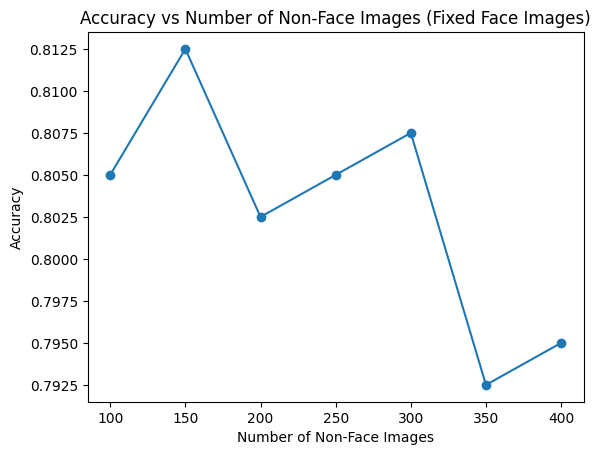

In [9]:
import matplotlib.pyplot as plt
plt.plot(num_non_face_train, accuracy, marker='o')
plt.xlabel('Number of Non-Face Images')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Non-Face Images (Fixed Face Images)')
plt.show()

plot the success and failure cases

In [26]:
success = 0
failure = 0
success_cases = []
failure_cases = []
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        success += 1
        success_cases.append((X_test[i], "Face" if y_test[i] == '2' else "Non-Face", "Correct"))
    else:
        failure += 1
        failure_cases.append((X_test[i], "Face" if y_test[i] == '2' else "Non-Face", "Incorrect"))
print(f"Success = {success}")
print(f"Failure = {failure}")

Success = 321
Failure = 79


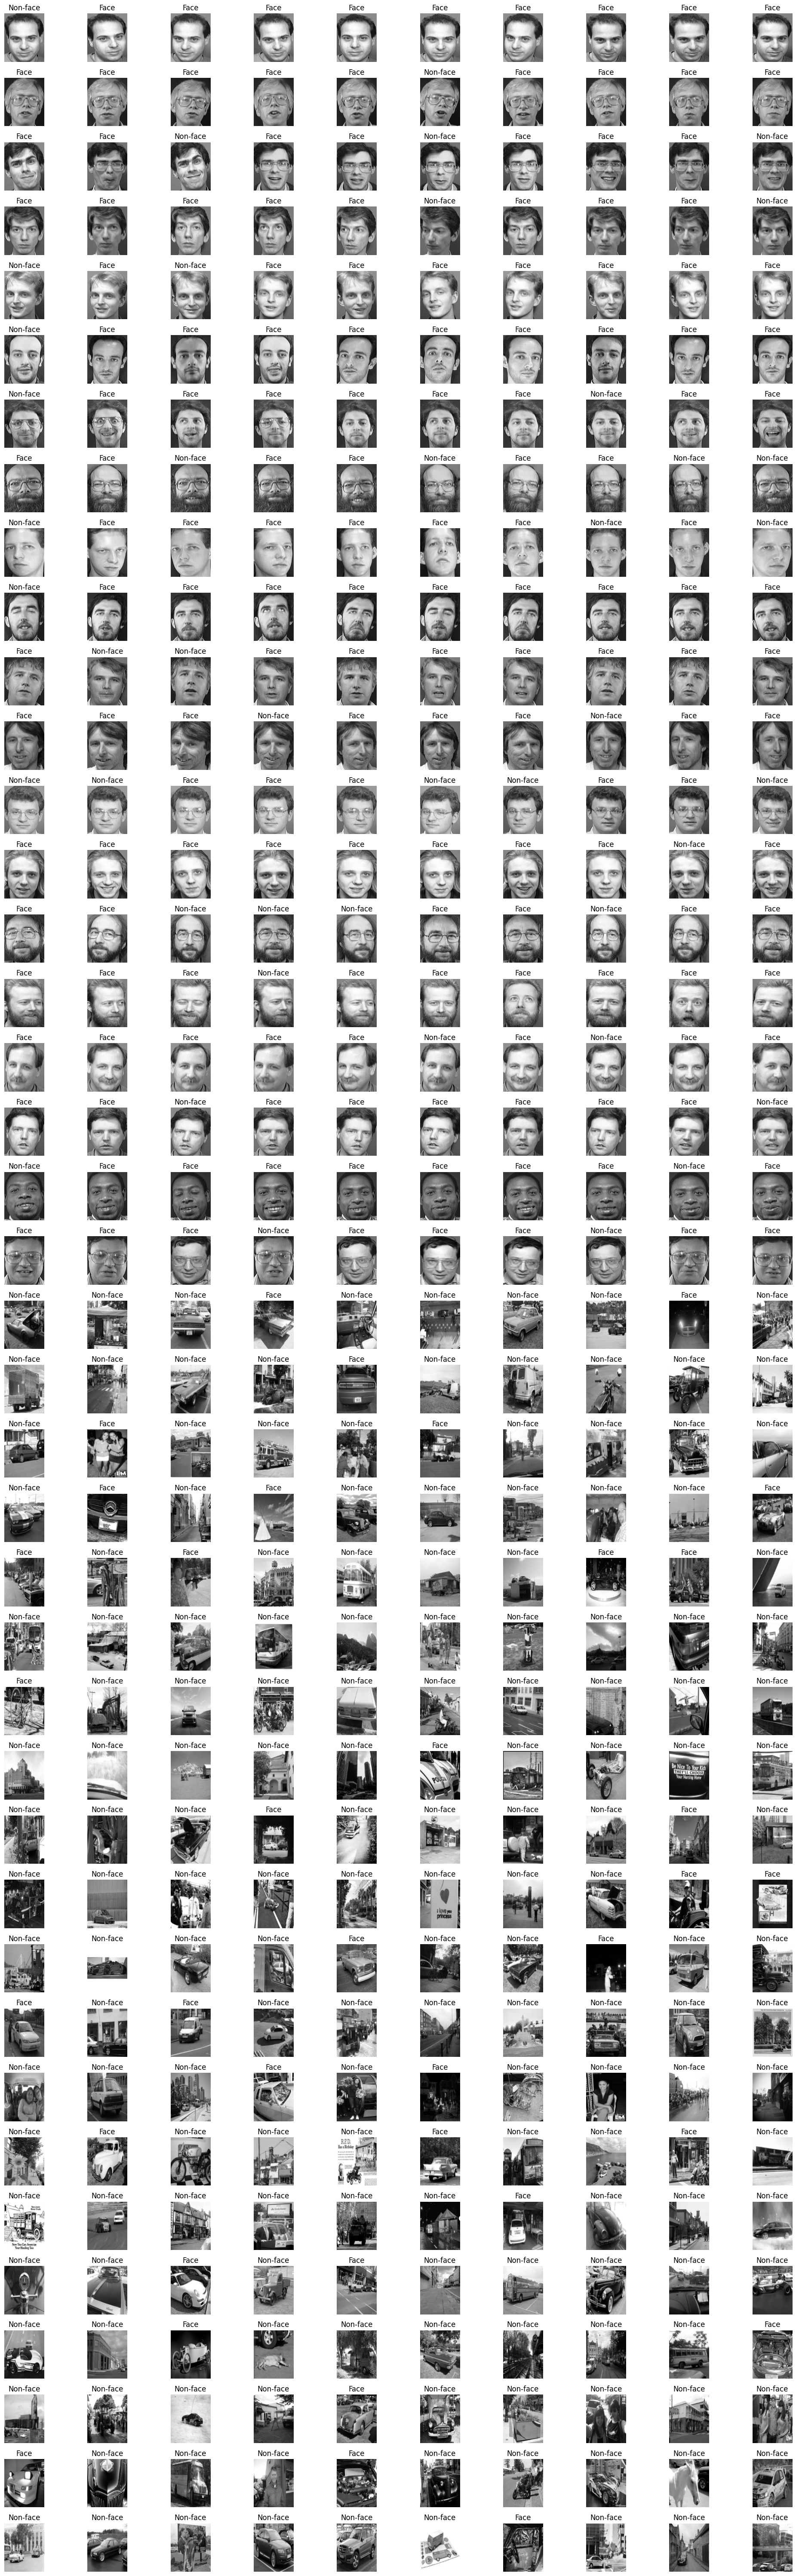

In [32]:

def visualize_data_with_labels(data, labels, num_rows, num_columns, image_height, image_width, figsize=(15, 40), image_scale=1.5):
    # Reshape the data to the appropriate dimensions
    data = data.reshape(-1, image_height, image_width)

    # Adjust image size based on the scale factor
    image_height *= image_scale
    image_width *= image_scale

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=figsize)

    # Loop through the data and plot each image with its label
    for i in range(num_rows):
        for j in range(num_columns):
            # Calculate the index in the flattened array
            index = i * num_columns + j

            # Get the image and label from the data and labels arrays
            image = data[index]
            label = labels[index]

            # Plot the image with scaled size
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].set_title('Non-face' if label == '1' else 'Face', fontsize=12)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

visualize_data_with_labels(X_test, y_pred, 40, 10, 112, 92, figsize=(20, 60), image_scale=2.0)



In case of fixed number of non faces

In [ ]:
data_train = np.concatenate((face_data[:200], non_face_data[:200]), axis=0)
label_train = np.concatenate((face_label[:200], non_face_label[:200]), axis=0)
data_test = np.concatenate((face_data[200:], non_face_data[200:]), axis=0)
label_test = np.concatenate((face_label[200:], non_face_label[200:]), axis=0)
print(data_train.shape)
print(label_train.shape)
print(data_test.shape)
print(label_test.shape)
print(data_train)
print(label_train)
X_combined_train = np.array(data_train)
X_combined_test = np.array(data_test)
y_combined_train = np.array(label_train)
y_combined_test = np.array(label_test)

In [ ]:
U = lda.LDA(X_combined_train, y_combined_train, 1)

In [ ]:
Projected_train_Data = X_combined_train.dot(U)
Projected_test_Data = X_combined_test.dot(U)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k =[1, 3, 5, 7]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Projected_train_Data, y_combined_train)
    y_combined_pred = knn.predict(Projected_test_Data)
    print(f"Accuracy for k = {i} is {accuracy_score(y_combined_test, y_combined_pred)}")
    